In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 解題步驟：

1. 讀取 titanic.csv
2. 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')
3. 分析缺失值，練習繪製直方圖(如下圖二)
4. 分別以平均值及眾數填補
5. 將剩下是字串的欄位轉為數值(Age and Embarked)
6. 將資料切分為訓練及測試集
7. 輸入隨機森林訓練並測試模型在訓練及測試集上的準確度

#### 圖一
<img src="./data/titanic.png" style="zoom:30%;" />

#### 圖二
<img src="./data/hist.png" style="zoom:100%;" />

## 讀取資料

In [207]:
""" Your code here: 讀取 titanic.csv """
titanic_df = pd.read_csv('titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')

In [208]:
""" Your code here: """

' Your code here: '

## 填補缺失值
1. Discrete: 繪製圖表以判斷該如何填補
2. Continual: 使用平均值或中位數
3. 若缺失值過多則刪除

In [209]:
""" Your code here: """
missing = titanic_df.isnull().sum(axis = 0)
missing = missing[missing >0]
missing.sort_values(inplace=True)
missing


Embarked      2
Age         177
Cabin       687
dtype: int64

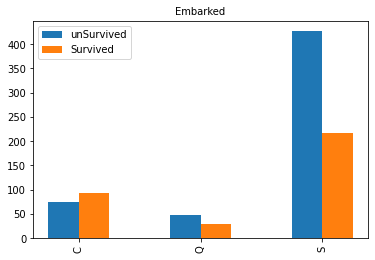

In [210]:
#################################### Embarked
unSurvived = titanic_df[titanic_df['Survived'] == 0].groupby('Embarked')["Survived"].size()
Survived = titanic_df[titanic_df['Survived'] == 1].groupby('Embarked')["Survived"].size()

plt.subplot(1, 1, 1)
width=0.25  # 設定長條寬度

# 因為要偏移，所以要把離散資料轉成數字
x = range(len(Survived.index))
# 第一種值
plt.bar(x, unSurvived, label='unSurvived', width=0.25)

# 第二種值
x2 = [p + width for p in x]  # X軸要偏移一點
plt.bar(x2, Survived, label='Survived', width=0.25)
plt.title(label = 'Embarked', fontdict = {'fontsize': 10})
plt.xticks(rotation = 'vertical')

# 把實際的值顯示在x軸上
plt.xticks([p + width/2 for p in x], Survived.index)
plt.legend()

plt.show()
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

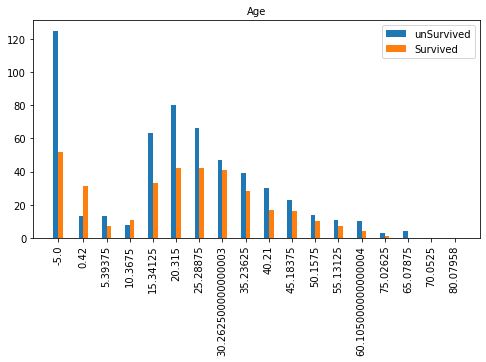

In [211]:
#################################### Age
# 年齡分箱
tmp_df = titanic_df.copy()
Age_cut = pd.cut(tmp_df['Age'], bins=16, labels=False, retbins=True, right=False)
new_column = []
tmp_df['Age_cut'] = [-5 if np.isnan(i) else Age_cut[1][int(i)] for i in Age_cut[0]]

unSurvived = tmp_df[tmp_df['Survived'] == 0].groupby('Age_cut')["Survived"].size()
Survived = tmp_df[tmp_df['Survived'] == 1].groupby('Age_cut')["Survived"].size()

bins = np.append(Age_cut[1], -5)
bins.sort(axis=0)
for i in bins:
    if Survived.get(i) is None:
        Survived[i] = 0
    if unSurvived.get(i) is None:
        unSurvived[i] = 0


plt.figure(figsize = (8, 4))
width=1  # 設定長條寬度

# 因為要偏移，所以要把離散資料轉成數字
x = bins
# 第一種值
plt.bar(x, unSurvived, label='unSurvived', width=width)

# 第二種值
x2 = [p + width for p in x]  # X軸要偏移一點
plt.bar(x2, Survived, label='Survived', width=width)
plt.title(label = 'Age', fontdict = {'fontsize': 10})
plt.xticks(rotation = 'vertical')

# 把實際的值顯示在x軸上
plt.xticks([p + width/2 for p in x], Survived.index)
plt.legend()

plt.show()



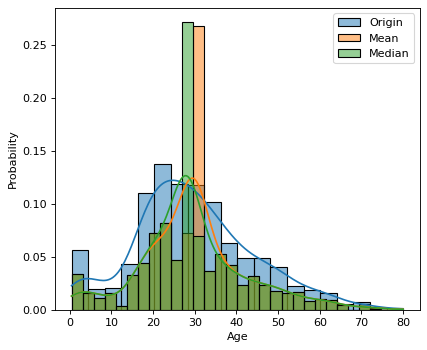

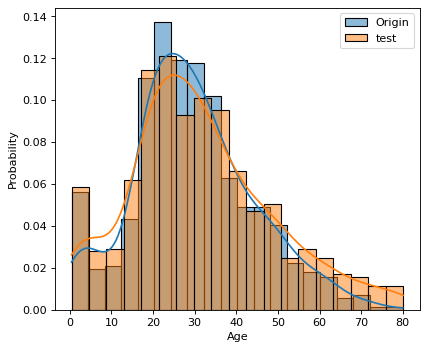

In [212]:
# 填入 'Mean', 'Median'
mean_df = tmp_df['Age'].fillna(tmp_df['Age'].mean())  # 平均數
median_df = tmp_df['Age'].fillna(tmp_df['Age'].median())  # 中位數

label = ['Origin', 'Mean', 'Median']
color = ['tab:blue', 'tab:orange', 'tab:green']
datas = [tmp_df['Age'], mean_df, median_df]

plt.figure(figsize = (20, 5), dpi = 80)
plt.subplot(1, 3, 1)

for i in range(3):
    sns.histplot(datas[i], kde = True, stat = 'probability', element = 'bars', label = label[i], color = color[i])
plt.legend()
plt.show()


# test
# 用Survived : unSurvived = 1 : 2的方式填入分箱值
us = 0
bins_idx = 0
bins_list = Age_cut[1]

cnt_list = []
for i in bins_list:
    cnt_list.append({ "value": i, 's' : 0, 'us' : 0})


done = 0
for i in titanic_df[titanic_df['Age'].isnull()]['Age'].index.to_list():
    data_y = tmp_df.iloc[i]['Survived']
    for lv in cnt_list:
        if data_y == 0:
            if lv['us'] != 2:
                tmp_df.loc[i,'Age'] = lv['value']
                lv['us'] = lv['us'] + 1
                done = 1
                break
        if data_y == 1:
            if lv['s'] != 1:
                tmp_df.loc[i,'Age'] = lv['value']
                lv['s'] = lv['s'] + 1
                done = 1
                break

    # 如果cnt_list的可填數量滿的就重製
    if done != 1:
        for a in bins_list:
            cnt_list.append({ "value": a, 's' : 0, 'us' : 0})

        for lv in cnt_list:
            if data_y == 0:
                if lv['us'] != 2:
                    tmp_df.loc[i,'Age'] = lv['value']
                    lv['us'] = lv['us'] + 1
                    done = 1
                    break
            if data_y == 1:
                if lv['s'] != 1:
                    tmp_df.loc[i,'Age'] = lv['value']
                    lv['s'] = lv['s'] + 1
                    done = 1
                    break

    done = 0


label = ['Origin', 'test']
color = ['tab:blue', 'tab:orange']
datas = [titanic_df['Age'], tmp_df['Age']]

plt.figure(figsize = (20, 5), dpi = 80)
plt.subplot(1, 3, 1)

for i in range(2):
    sns.histplot(datas[i], kde = True, stat = 'probability', element = 'bars', label = label[i], color = color[i])
plt.legend()
plt.show()



In [213]:
# 決定用test方法
cnt_list = []
for i in bins_list:
    cnt_list.append({ "value": i, 's' : 0, 'us' : 0})


done = 0
for i in titanic_df[titanic_df['Age'].isnull()]['Age'].index.to_list():
    data_y = titanic_df.iloc[i]['Survived']
    for lv in cnt_list:
        if data_y == 0:
            if lv['us'] != 2:
                titanic_df.loc[i,'Age'] = lv['value']
                lv['us'] = lv['us'] + 1
                done = 1
                break
        if data_y == 1:
            if lv['s'] != 1:
                titanic_df.loc[i,'Age'] = lv['value']
                lv['s'] = lv['s'] + 1
                done = 1
                break

    # 如果cnt_list的可填數量滿的就重製
    if done != 1:
        for a in bins_list:
            cnt_list.append({ "value": a, 's' : 0, 'us' : 0})

        for lv in cnt_list:
            if data_y == 0:
                if lv['us'] != 2:
                    titanic_df.loc[i,'Age'] = lv['value']
                    lv['us'] = lv['us'] + 1
                    done = 1
                    break
            if data_y == 1:
                if lv['s'] != 1:
                    titanic_df.loc[i,'Age'] = lv['value']
                    lv['s'] = lv['s'] + 1
                    done = 1
                    break

    done = 0

In [214]:
missing = titanic_df.isnull().sum(axis = 0)
missing = missing[missing >0]
missing.sort_values(inplace=True)
missing


Cabin    687
dtype: int64

In [215]:
titanic_df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [216]:
#################################### Cabin
# 少太多決定刪除
del titanic_df['Cabin']
missing = titanic_df.isnull().sum(axis = 0)
missing = missing[missing >0]
missing.sort_values(inplace=True)
missing

Series([], dtype: int64)

## Feature transformation(Sex and Embarked)
- Label encoding
- One-hot encoding

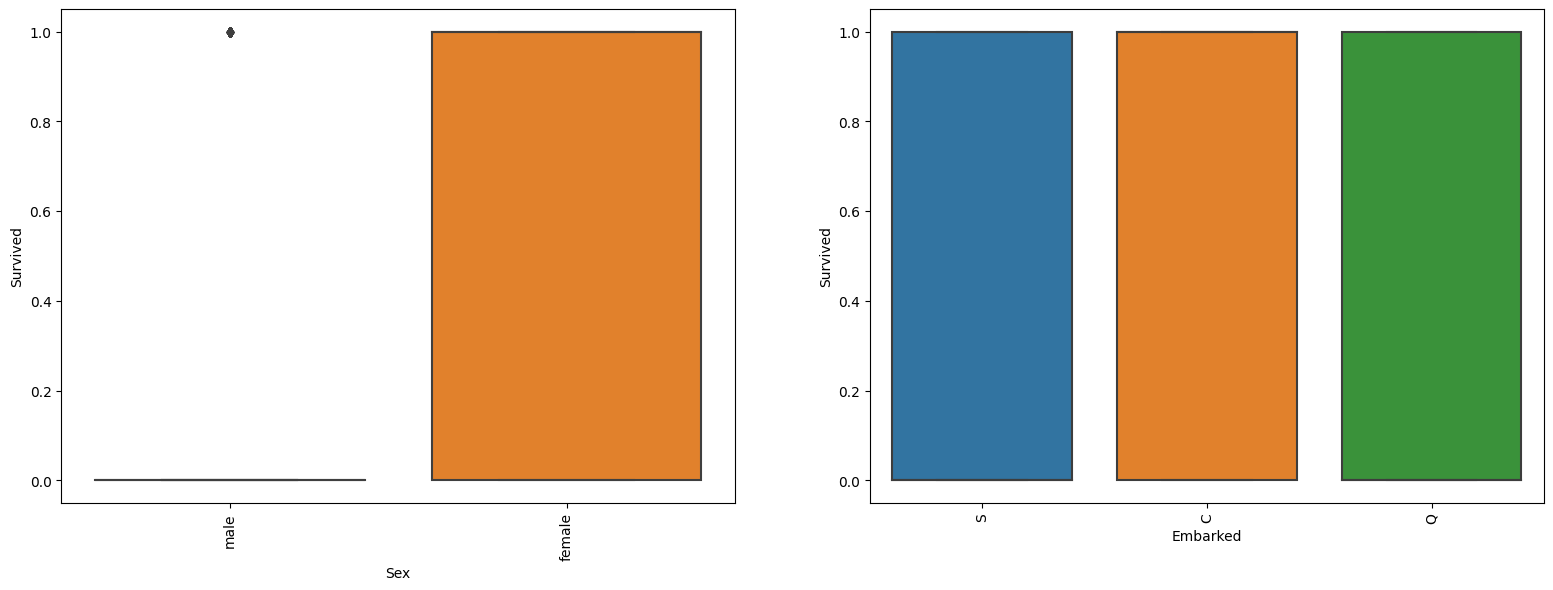

In [217]:
""" Your code here: """
discrete = [f for f in titanic_df.columns if titanic_df.dtypes[f] == 'object' and f not in ['PassengerId', 'Name', 'Cabin', 'Ticket']]
y_label = 'Survived'
y = titanic_df[y_label]

plt.figure(figsize = (40, 85), dpi = 100)
for i, feature in enumerate(discrete):
    plt.subplot(11, 4, i + 1)
    sns.boxplot(x = titanic_df[feature], y = y)
    # plt.title(label = feature, fontdict = {'fontsize': 10})
    plt.xticks(rotation = 'vertical')

plt.show()


In [218]:
dummies = pd.get_dummies(titanic_df['Sex'], prefix = 'Sex')
titanic_df = pd.concat([titanic_df, dummies], axis = 1)
titanic_df.drop(columns = ['Sex'], inplace = True)



In [219]:
dummies = pd.get_dummies(titanic_df['Embarked'], prefix = 'Embarked')
titanic_df = pd.concat([titanic_df, dummies], axis = 1)
titanic_df.drop(columns = ['Embarked'], inplace = True)
titanic_df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.00000,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00000,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.00000,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.00000,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.00000,0,0,211536,13.0000,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.00000,0,0,112053,30.0000,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",55.13125,1,2,W./C. 6607,23.4500,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.00000,0,0,111369,30.0000,0,1,1,0,0


In [205]:
# 作業部分
# titanic_df.drop(columns = ['PassengerId'], inplace = True)
# titanic_df.drop(columns = ['Name'], inplace = True)
# titanic_df.drop(columns = ['Ticket'], inplace = True)


In [224]:
discrete = [f for f in titanic_df.columns if titanic_df.dtypes[f] == 'object']

for i in titanic_df['Ticket']:
    print(i)


A/5 21171
PC 17599
STON/O2. 3101282
113803
373450
330877
17463
349909
347742
237736
PP 9549
113783
A/5. 2151
347082
350406
248706
382652
244373
345763
2649
239865
248698
330923
113788
349909
347077
2631
19950
330959
349216
PC 17601
PC 17569
335677
C.A. 24579
PC 17604
113789
2677
A./5. 2152
345764
2651
7546
11668
349253
SC/Paris 2123
330958
S.C./A.4. 23567
370371
14311
2662
349237
3101295
A/4. 39886
PC 17572
2926
113509
19947
C.A. 31026
2697
C.A. 34651
CA 2144
2669
113572
36973
347088
PC 17605
2661
C.A. 29395
S.P. 3464
3101281
315151
C.A. 33111
CA 2144
S.O.C. 14879
2680
1601
348123
349208
374746
248738
364516
345767
345779
330932
113059
SO/C 14885
3101278
W./C. 6608
SOTON/OQ 392086
19950
343275
343276
347466
W.E.P. 5734
C.A. 2315
364500
374910
PC 17754
PC 17759
231919
244367
349245
349215
35281
7540
3101276
349207
343120
312991
349249
371110
110465
2665
324669
4136
2627
STON/O 2. 3101294
370369
11668
PC 17558
347082
S.O.C. 14879
A4. 54510
237736
27267
35281
2651
370372
C 17369
2668
3470

## 切分訓練集及測試集

In [187]:
""" Your code here: """
from sklearn.model_selection import train_test_split

y = titanic_df['Survived']
del titanic_df['Survived']
X = titanic_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Training

In [188]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

## Evaluation

In [190]:
print('Training report')
pred = RF.predict(X_train)
print(classification_report(y_train, pred))

print()
print('Testing report')
pred = RF.predict(X_test)
print(classification_report(y_test, pred))

Training report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       418
           1       0.99      0.99      0.99       250

    accuracy                           0.99       668
   macro avg       0.99      0.99      0.99       668
weighted avg       0.99      0.99      0.99       668


Testing report
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       131
           1       0.79      0.64      0.71        92

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223

